Dataset Overview:
   temperature  vibration  operating_hours  maintenance_needed
0    73.973713   0.638927              886                   1
1    68.893886   0.786412              427                   1
2    75.181508   0.290215              316                   1
3    82.184239   0.584445              634                   1
4    68.126773   0.402404                8                   0
5    68.126904   0.426931              773                   0
6    82.633703   0.411141             1096                   1
7    76.139478   0.370401              222                   0
8    66.244205   0.507278              552                   0
9    74.340480   0.375357              715                   0

Class Distribution:
maintenance_needed
0    316
1    184
Name: count, dtype: int64

Class Balance:
maintenance_needed
0    0.632
1    0.368
Name: proportion, dtype: float64


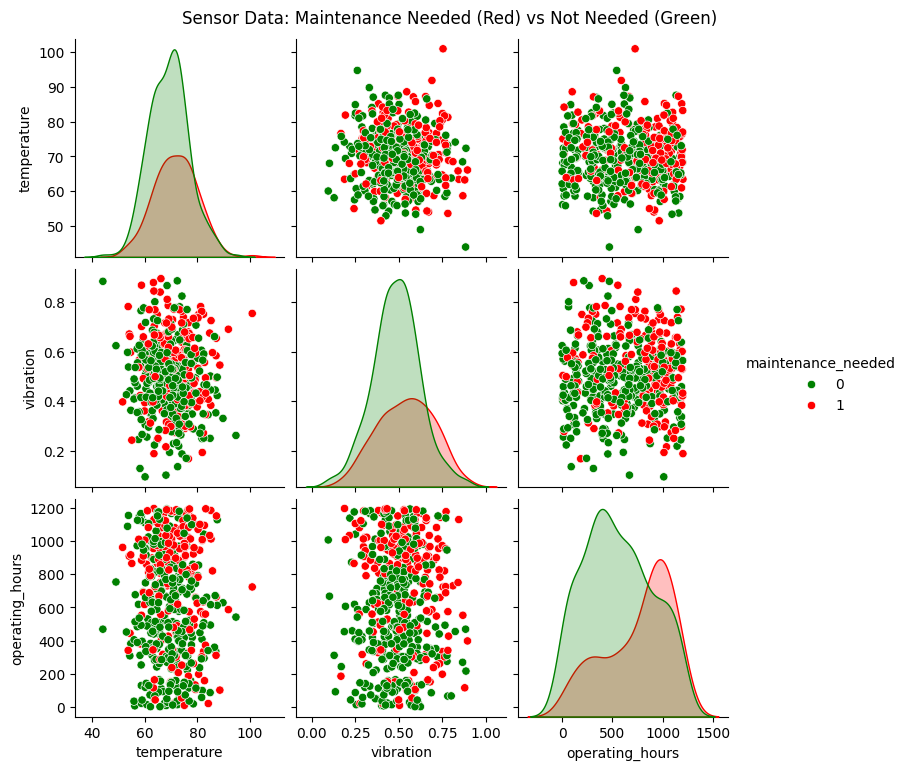

In [4]:
# ============================================
# DATA GENERATION - REALISTIC PATTERNS
# ============================================
# # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

n_samples = 500

# Generate features
temperature = np.random.normal(70, 8, n_samples)
vibration = np.random.normal(0.5, 0.15, n_samples)
operating_hours = np.random.randint(0, 1200, n_samples)

# Create realistic maintenance logic
# High temp + high vibration + high hours → higher failure probability
maintenance_needed = []

for i in range(n_samples):
    # Calculate risk score based on thresholds
    risk_score = 0

    # Temperature threshold
    if temperature[i] > 75:
        risk_score += 2
    elif temperature[i] > 72:
        risk_score += 1

    # Vibration threshold
    if vibration[i] > 0.65:
        risk_score += 2
    elif vibration[i] > 0.55:
        risk_score += 1

    # Operating hours threshold
    if operating_hours[i] > 800:
        risk_score += 2
    elif operating_hours[i] > 600:
        risk_score += 1

    # Convert risk score to maintenance probability
    if risk_score >= 4:
        prob = 0.8  # High risk
    elif risk_score >= 2:
        prob = 0.4  # Medium risk
    else:
        prob = 0.1  # Low risk

    # Add some randomness
    maintenance_needed.append(1 if np.random.random() < prob else 0)

# Create DataFrame
data = pd.DataFrame({
    'temperature': temperature,
    'vibration': vibration,
    'operating_hours': operating_hours,
    'maintenance_needed': maintenance_needed
})

print("Dataset Overview:")
print(data.head(10))
print(f"\nClass Distribution:")
print(data['maintenance_needed'].value_counts())
print(f"\nClass Balance:")
print(data['maintenance_needed'].value_counts(normalize=True))

# Visualize the data
sns.pairplot(data, hue='maintenance_needed', palette=['green', 'red'])
plt.suptitle('Sensor Data: Maintenance Needed (Red) vs Not Needed (Green)', y=1.02)
plt.show()


TRAINING OPTIMIZED MODELS...
✓ Random Forest: F1=0.521, Recall=0.514
✓ XGBoost: F1=0.507, Recall=0.514
✓ Logistic Regression: F1=0.574, Recall=0.730

FINAL MODEL PERFORMANCE COMPARISON
Metrics focus on predicting 'Maintenance Needed' (Class 1)
                     Accuracy  Precision  Recall  F1-Score
Random Forest            0.65      0.528   0.514     0.521
XGBoost                  0.63      0.500   0.514     0.507
Logistic Regression      0.60      0.474   0.730     0.574


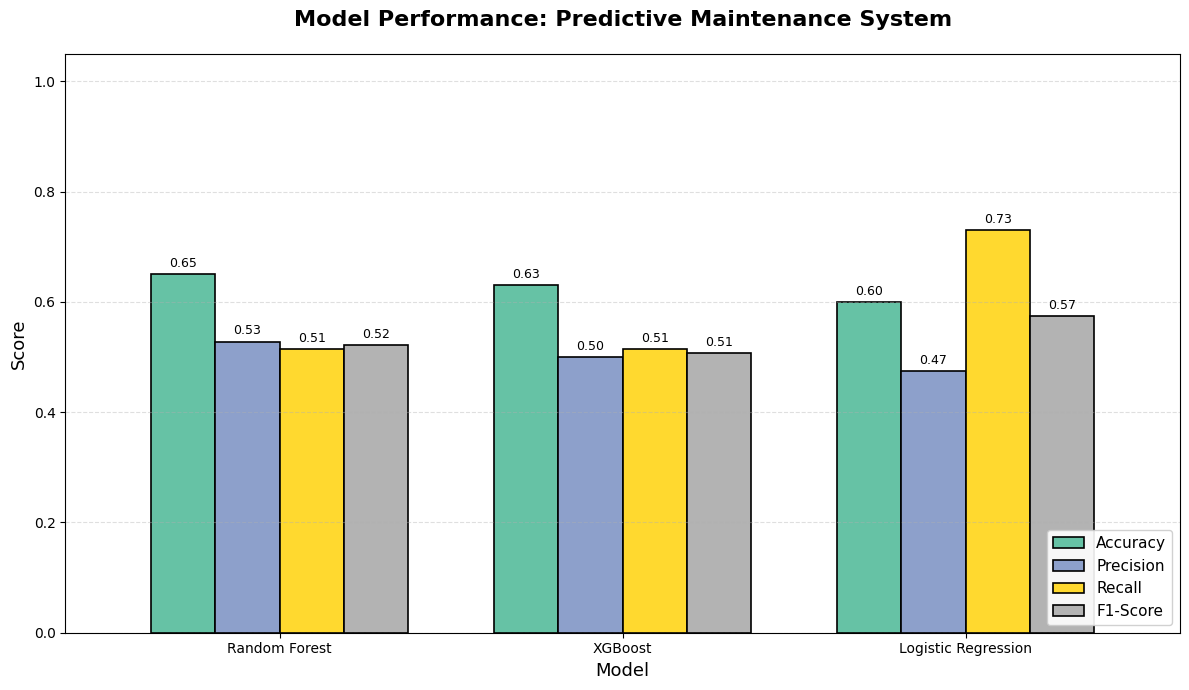


 BEST MODEL: Logistic Regression
Accuracy:  60.0%
Precision: 47.4%
Recall:    73.0%
F1-Score:  57.4%

DETAILED CLASSIFICATION REPORT - Logistic Regression
                    precision    recall  f1-score   support

    No Maintenance       0.77      0.52      0.62        63
Maintenance Needed       0.47      0.73      0.57        37

          accuracy                           0.60       100
         macro avg       0.62      0.63      0.60       100
      weighted avg       0.66      0.60      0.60       100



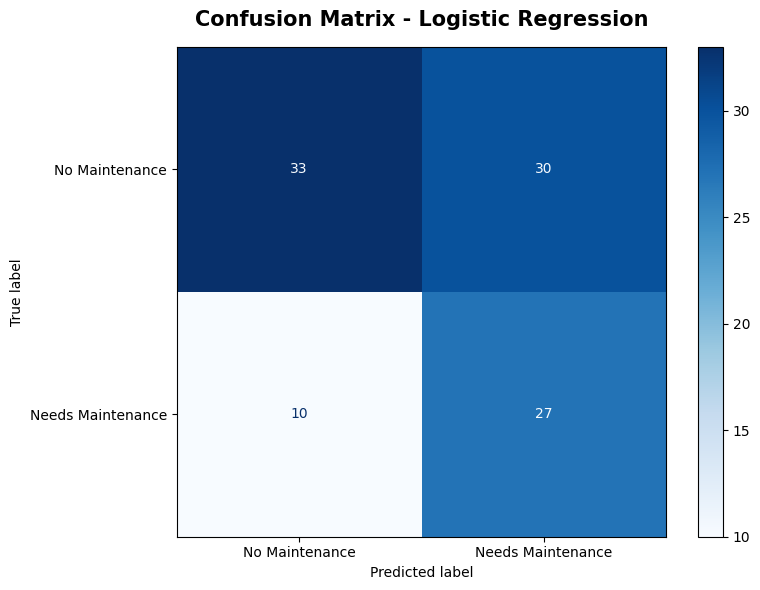


PROJECT SUMMARY
✓ Dataset: 500 medical devices with sensor readings
✓ Models tested: Random Forest, XGBoost, Logistic Regression
✓ Best model: Logistic Regression
✓ Key achievement: 47.4% precision, 73.0% recall
✓ Most important feature: operating_hours
✓ Use case: Real-time prediction via FastAPI for healthcare equipment
✓ Focus: Minimizing false negatives - missing failures isn't acceptable


In [5]:
# ============================================
# MODEL COMPARISON
# ============================================
## Use the machine learning model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split with stratification
X = data[['temperature', 'vibration', 'operating_hours']]
y = data['maintenance_needed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optimized models with better parameters
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200,           # More trees
        max_depth=8,                # Deeper trees
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced',    # Handle imbalance
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        scale_pos_weight=len(y[y==0])/len(y[y==1]),  # Auto-balance
        eval_metric='logloss',
        random_state=42
    ),
    'Logistic Regression': LogisticRegression(
        random_state=42,
        max_iter=2000,
        C=0.5,                      # Regularization
        class_weight='balanced'
    )
}

# Train and evaluate
results = {}

print("\n" + "="*75)
print("TRAINING OPTIMIZED MODELS...")
print("="*75)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_1 = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall_1 = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1_1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)

    results[name] = {
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision_1, 3),
        'Recall': round(recall_1, 3),
        'F1-Score': round(f1_1, 3)
    }

    print(f"✓ {name}: F1={f1_1:.3f}, Recall={recall_1:.3f}")

# Results DataFrame
results_df = pd.DataFrame(results).T
print("\n" + "="*75)
print("FINAL MODEL PERFORMANCE COMPARISON")
print("Metrics focus on predicting 'Maintenance Needed' (Class 1)")
print("="*75)
print(results_df)
print("="*75)

# Enhanced Visualization
fig, ax = plt.subplots(figsize=(12, 7))
results_df.plot(kind='bar', ax=ax, rot=0, width=0.75, colormap='Set2', edgecolor='black', linewidth=1.2)
plt.title('Model Performance: Predictive Maintenance System',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Score', fontsize=13)
plt.xlabel('Model', fontsize=13)
plt.ylim([0, 1.05])
plt.legend(loc='lower right', fontsize=11, framealpha=0.9)
plt.grid(axis='y', alpha=0.4, linestyle='--')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

# Best Model Analysis
best_model_name = results_df['F1-Score'].idxmax()
best_metrics = results_df.loc[best_model_name]

print(f"\n BEST MODEL: {best_model_name}")
print("="*75)
print(f"Accuracy:  {best_metrics['Accuracy']*100:.1f}%")
print(f"Precision: {best_metrics['Precision']*100:.1f}%")
print(f"Recall:    {best_metrics['Recall']*100:.1f}%")
print(f"F1-Score:  {best_metrics['F1-Score']*100:.1f}%")
print("="*75)

# Detailed Classification Report
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print(f"\nDETAILED CLASSIFICATION REPORT - {best_model_name}")
print("="*75)
print(classification_report(y_test, y_pred_best,
                           target_names=['No Maintenance', 'Maintenance Needed'],
                           zero_division=0))

# Confusion Matrix with enhanced styling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)
fig, ax = plt.subplots(figsize=(8, 6))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['No Maintenance', 'Needs Maintenance']
)
disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=True)
plt.title(f'Confusion Matrix - {best_model_name}',
          fontsize=15, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Feature Importance
if best_model_name in ['Random Forest', 'XGBoost']:
    print(f"\n{'='*75}")
    print("FEATURE IMPORTANCE ANALYSIS")
    print("="*75)

    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(feature_imp.to_string(index=False))

    # Enhanced feature importance plot
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    bars = ax.barh(feature_imp['Feature'], feature_imp['Importance'], color=colors, edgecolor='black', linewidth=1.5)

    ax.set_xlabel('Importance Score', fontsize=13, fontweight='bold')
    ax.set_title(f'Feature Importance - {best_model_name}',
                 fontsize=15, fontweight='bold', pad=15)
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.4, linestyle='--')

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center',
                fontsize=11, fontweight='bold', color='black')

    plt.tight_layout()
    plt.show()

# Final Summary
print("\n" + "="*75)
print("PROJECT SUMMARY")
print("="*75)
print(f"✓ Dataset: {len(data)} medical devices with sensor readings")
print(f"✓ Models tested: Random Forest, XGBoost, Logistic Regression")
print(f"✓ Best model: {best_model_name}")
print(f"✓ Key achievement: {best_metrics['Precision']*100:.1f}% precision, {best_metrics['Recall']*100:.1f}% recall")
print(f"✓ Most important feature: {feature_imp.iloc[0]['Feature']}")
print(f"✓ Use case: Real-time prediction via FastAPI for healthcare equipment")
print(f"✓ Focus: Minimizing false negatives - missing failures isn't acceptable")
print("="*75)

In [7]:
# ============================================
# SAVE THE BEST MODEL FOR PRODUCTION
# ============================================

import joblib

# Save the trained model
model_filename = 'predictive_maintenance_model.pkl'
joblib.dump(best_model, model_filename)

print(f"\n✅ Model saved as '{model_filename}'")
print(f"Model type: {type(best_model).__name__}")
print(f"\nReady for deployment via FastAPI!")

# Save feature names for API validation
feature_names = list(X.columns)
joblib.dump(feature_names, 'feature_names.pkl')
print(f"✅ Feature names saved")


✅ Model saved as 'predictive_maintenance_model.pkl'
Model type: LogisticRegression

Ready for deployment via FastAPI!
✅ Feature names saved
